In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [2]:
%run Feature_Creation.ipynb
%run Auxillary_Functions.ipynb

In [4]:
SPY = pd.read_csv(os.path.join(os.path.abspath(os.getcwd()),'data','10_ETF','SPY.csv'))
SPY.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,207.990005,208.190002,205.389999,205.539993,184.358871,130333800
1,2015-01-02,206.380005,206.880005,204.179993,205.429993,184.260223,121465900
2,2015-01-05,204.169998,204.369995,201.350006,201.720001,180.932541,169632600
3,2015-01-06,202.089996,202.720001,198.860001,199.820007,179.228363,209151400
4,2015-01-07,201.419998,202.720001,200.880005,202.309998,181.461731,125346700


In [7]:
SPY = pd.read_csv(os.path.join(os.path.abspath(os.getcwd()),'data','largecap','SPY.csv'))

SPY_feat = create_features(SPY)

SPY_feat.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month_1,Month_2,Month_3,...,RSI_overbought,RSI_oversold,prev_hot_streak,prev_cold_streak,current_hot_streak,current_cold_streak,prev_current_hot,prev_current_cold,current_hot_prev_cold,current_cold_prev_hot
0,2015-01-12,204.410004,204.600006,201.919998,202.649994,181.766663,144396100,1,0,0,...,False,False,2.0,3.0,0.0,2.0,2.0,1.0,-3.0,0.0
1,2015-01-13,204.119995,205.479996,200.509995,202.080002,181.255432,214553300,1,0,0,...,False,False,2.0,3.0,0.0,3.0,2.0,0.0,-3.0,1.0
2,2015-01-14,199.649994,201.100006,198.570007,200.860001,180.161163,192991100,1,0,0,...,False,False,2.0,3.0,0.0,4.0,2.0,-1.0,-3.0,2.0
3,2015-01-15,201.630005,202.009995,198.880005,199.020004,178.510773,176613900,1,0,0,...,False,True,2.0,3.0,0.0,5.0,2.0,-2.0,-3.0,3.0
4,2015-01-16,198.770004,201.820007,198.550003,201.630005,180.851807,211879600,1,0,0,...,False,False,2.0,5.0,1.0,0.0,1.0,5.0,-4.0,-2.0


In [9]:
SPY_feat.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'dayowk_0', 'dayowk_1', 'dayowk_2', 'dayowk_3', 'dayowk_4', '1day_pct',
       '2day_pct', '3day_pct', '4day_pct', '5day_pct', '7day_pct',
       '1day_pct_cs', 'ewma_7', 'ewma_50', 'ewma_200', 'RSI', 'MACD',
       'day_var', 'open_close', 'high_close', 'open_prev_close', 'target',
       'RSI_overbought', 'RSI_oversold', 'prev_hot_streak', 'prev_cold_streak',
       'current_hot_streak', 'current_cold_streak', 'prev_current_hot',
       'prev_current_cold', 'current_hot_prev_cold', 'current_cold_prev_hot'],
      dtype='object')

In [105]:
continuous = ['1day_pct', '2day_pct', '3day_pct', #'4day_pct', '5day_pct', '7day_pct',
              '1day_pct_cs',
              'ewma_7', 'ewma_50', 'ewma_200', 'RSI', 'MACD','Volume','day_var','open_close','open_prev_close','high_close']
discrete = ['target','prev_hot_streak','prev_cold_streak', 'current_hot_streak', 'current_cold_streak'
            #'RSI_overbought','RSI_oversold',
            #'7g(50&200)','7l(50&200)','7g50','7g200', 'prev_current_hot', 'prev_current_cold','current_hot_prev_cold','current_cold_prev_hot'
           ]
scaler = StandardScaler()
SPY_cont = pd.DataFrame(scaler.fit_transform(SPY_feat[continuous]),columns=continuous)

SPY_disc = SPY_feat[discrete]

SPY_cont.reset_index(drop=True,inplace=True)

SPY_disc.reset_index(drop=True,inplace=True)

SPY_feat = pd.concat([SPY_cont,SPY_disc],axis=1)

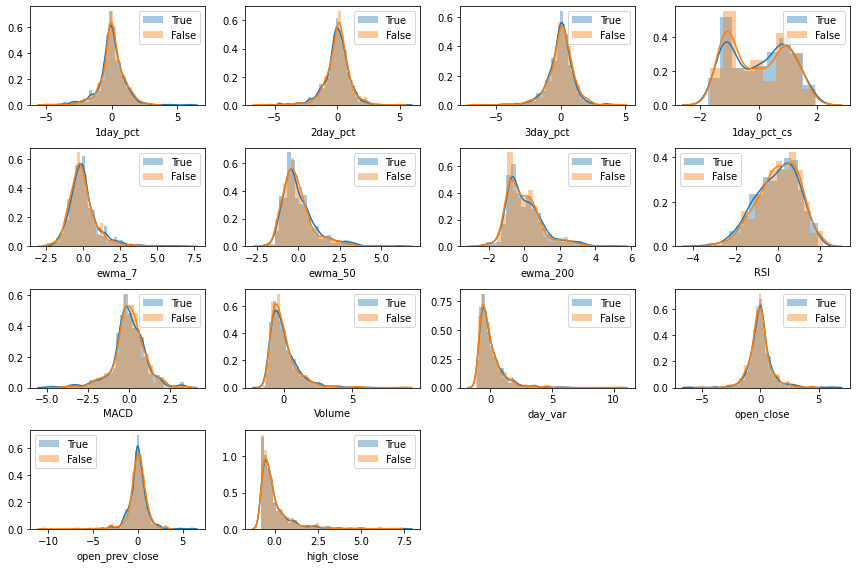

In [106]:
df_True = SPY_feat[SPY_feat.target==True]
df_False = SPY_feat[SPY_feat.target==False]

fig = plt.figure(figsize=(12,8))

for i,col in enumerate(continuous):
    plt.subplot(4,4,i+1);
    sns.distplot(df_True[col],label='True');
    sns.distplot(df_False[col],label='False');
    plt.legend()
    plt.tight_layout()

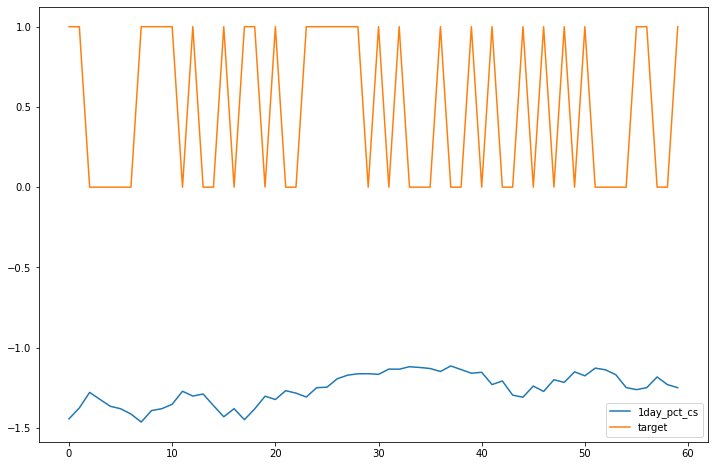

In [110]:
ax = SPY_feat[['1day_pct_cs']].iloc[0:60].plot(figsize = (12,8))
SPY_feat[['target']].iloc[0:60].plot(ax=ax)

In [70]:
SPY_feat['target'].value_counts()/SPY_feat['target'].value_counts().sum()

1.0    0.545236
0.0    0.454764
Name: target, dtype: float64

In [90]:
SPY_feat[SPY_feat['1day_pct'].cumsum()>-1]['target'].value_counts()#/SPY_feat[SPY_feat['1day_pct'].cumsum()>1.5]['target'].value_counts().sum()

0.0    114
1.0    110
Name: target, dtype: int64

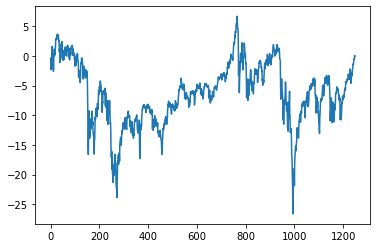

In [92]:
SPY_feat['1day_pct'].cumsum().plot()

0.00020926839854629943 0.00867005202214709
0.0008210632245828377 0.008139711488356367


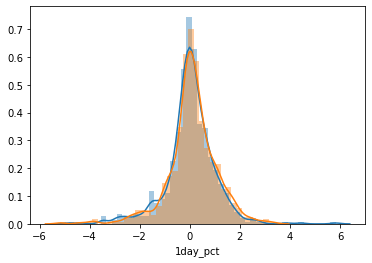

In [13]:
print(df_True['1day_pct'].mean(),df_True['1day_pct'].std())
print(df_False['1day_pct'].mean(),df_False['1day_pct'].std())

sns.distplot(df_True['1day_pct']/df_True['1day_pct'].std())
sns.distplot(df_False['1day_pct']/df_False['1day_pct'].std())

In [17]:
(SPY_feat['1day_pct']/SPY_feat['1day_pct'].std()).iloc[0:20]

1    -0.333433
2    -0.715713
3    -1.086004
4     1.554709
5     0.252840
6     0.598436
7     1.762963
8    -0.649988
9     0.277638
10   -1.563762
11   -1.520343
12    1.095826
13   -1.490753
14    1.468138
15    1.714382
16   -0.451402
17    1.196774
18   -0.327829
19   -0.530612
20    1.262943
Name: 1day_pct, dtype: float64

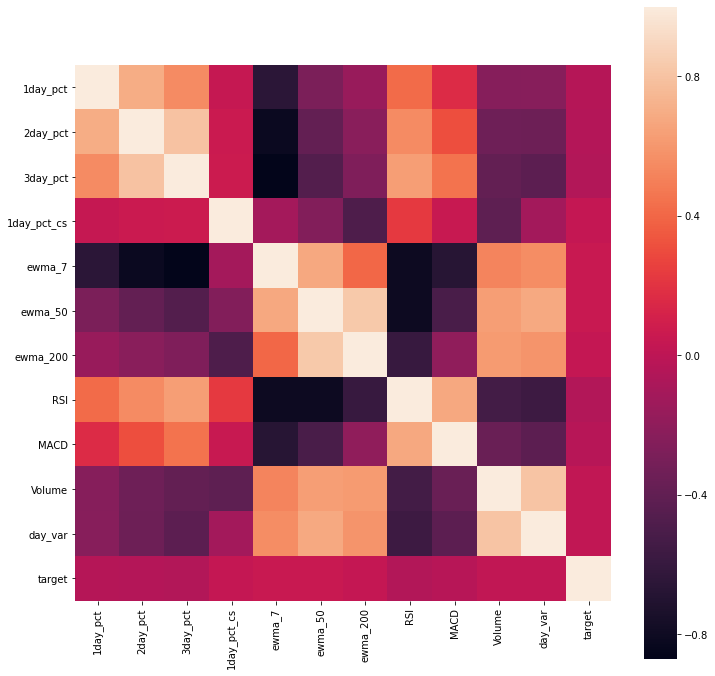

In [108]:
plt.figure(figsize=(12,12))
sns.heatmap(SPY_feat[['1day_pct', '2day_pct', '3day_pct', #'4day_pct', '5day_pct', '7day_pct',
                      '1day_pct_cs',
       'ewma_7', 'ewma_50', 'ewma_200', 'RSI', 'MACD','Volume','day_var','target']].corr(),vmax=1.,square=True)

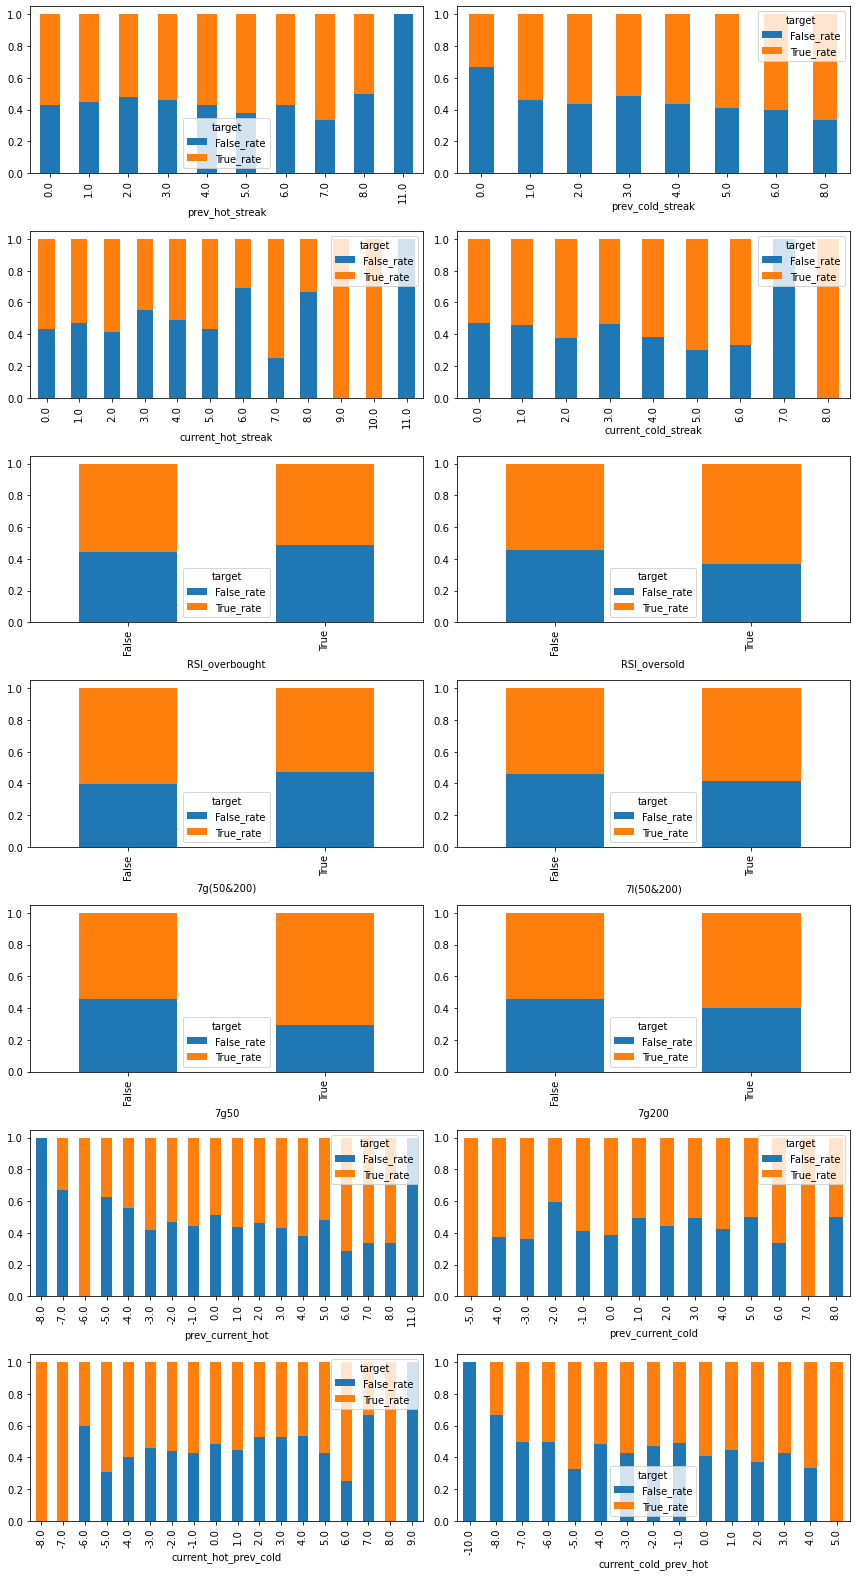

In [32]:
fig, axes = plt.subplots(7,2, figsize=(12,22))
axes = axes.ravel()
for i,col in enumerate(discrete):
    df2 = SPY_feat.groupby([col, 'target'])[col].count().unstack('target').fillna(0)
    df2['False_rate'] = df2[0]/(df2[0]+df2[1])
    df2['True_rate'] = df2[1]/(df2[0]+df2[1])
    df2[['False_rate','True_rate']].plot(kind='bar',stacked=True,ax=axes[i])
plt.tight_layout()

,Date,Adj Close,Volume,1day_pct,2day_pct,3day_pct,4day_pct,5day_pct,7day_pct,ewma_7,...,current_hot_streak,current_cold_streak,prev_current_hot,prev_current_cold,current_hot_prev_cold,current_cold_prev_hot,7g(50&200),7l(50&200),7g50,7g200
1,2015-01-13,181.255432,214553300,-0.002813,-0.010624,-0.018553,-0.001137,0.011310,-0.016307,1.004716,...,0.0,1.0,0.0,-1.0,0.0,1.0,False,True,False,False
2,2015-01-14,180.161163,192991100,-0.006037,-0.008833,-0.016597,-0.024478,-0.007167,-0.004263,1.007952,...,0.0,2.0,0.0,-2.0,0.0,2.0,False,True,False,False
3,2015-01-15,178.510773,176613900,-0.009161,-0.015142,-0.017912,-0.025606,-0.033414,-0.004004,1.012763,...,0.0,3.0,0.0,-3.0,0.0,3.0,False,True,False,False
4,2015-01-16,180.851807,211879600,0.013114,0.003833,-0.002227,-0.005033,-0.012827,-0.003361,0.999743,...,1.0,0.0,-1.0,3.0,-2.0,0.0,False,True,False,False
5,2015-01-20,181.237518,130991100,0.002133,0.015275,0.005974,-0.000099,-0.002911,-0.018650,0.998226,...,2.0,0.0,-2.0,3.0,-1.0,0.0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2019-12-20,317.458038,147142100,0.004384,0.008501,0.008564,0.008785,0.015716,0.025084,0.991103,...,8.0,0.0,-5.0,2.0,6.0,-3.0,True,False,False,False
1246,2019-12-23,317.943054,52990000,0.001528,0.005919,0.010042,0.010105,0.010326,0.017877,0.992193,...,9.0,0.0,-6.0,2.0,7.0,-3.0,True,False,False,False
1247,2019-12-24,317.952972,20270000,0.000031,0.001559,0.005950,0.010073,0.010137,0.017299,0.994122,...,10.0,0.0,-7.0,2.0,8.0,-3.0,True,False,False,False
1248,2019-12-26,319.645508,30911200,0.005323,0.005355,0.006891,0.011305,0.015450,0.015736,0.991643,...,11.0,0.0,-8.0,2.0,9.0,-3.0,True,False,False,False


In [76]:
(SPY_feat[SPY_feat['Close']==SPY_feat['High']]['target']).value_counts()/(SPY_feat[SPY_feat['Close']==SPY_feat['High']]['target']).value_counts().sum()

0.0    0.555556
1.0    0.444444
Name: target, dtype: float64

In [78]:
(SPY_feat[SPY_feat['Close']==SPY_feat['Low']]['target']).value_counts()/(SPY_feat[SPY_feat['Close']==SPY_feat['Low']]['target']).value_counts().sum()

1.0    0.5
0.0    0.5
Name: target, dtype: float64

In [79]:
(SPY_feat[SPY_feat['Open']==SPY_feat['High']]['target']).value_counts()/(SPY_feat[SPY_feat['Open']==SPY_feat['High']]['target']).value_counts().sum()

1.0    0.75
0.0    0.25
Name: target, dtype: float64

In [81]:
(SPY_feat[SPY_feat['Open']==SPY_feat['Low']]['target']).value_counts()/(SPY_feat[SPY_feat['Open']==SPY_feat['Low']]['target']).value_counts().sum()

1.0    0.555556
0.0    0.444444
Name: target, dtype: float64

In [84]:
SPY_feat[['Open','Close','High','Low','Adj Close','target','prev_hot_streak','current_hot_streak']].iloc[0:10]

,Open,Close,High,Low,Adj Close,target,prev_hot_streak,current_hot_streak
1,204.119995,202.080002,205.479996,200.509995,181.255432,0.0,0.0,0.0
2,199.649994,200.860001,201.100006,198.570007,180.161163,0.0,0.0,0.0
3,201.630005,199.020004,202.009995,198.880005,178.510773,1.0,0.0,0.0
4,198.770004,201.630005,201.820007,198.550003,180.851807,1.0,0.0,1.0
5,202.399994,202.059998,202.720001,200.169998,181.237518,1.0,0.0,2.0
6,201.500000,203.080002,203.660004,200.940002,182.152390,1.0,0.0,3.0
7,203.990005,206.100006,206.259995,202.330002,184.861160,0.0,0.0,4.0
8,205.789993,204.970001,206.100006,204.809998,183.847610,1.0,4.0,0.0
9,204.710007,205.449997,205.559998,203.850006,184.278168,0.0,4.0,1.0
10,202.970001,202.740005,204.119995,201.740005,181.847427,0.0,1.0,0.0


In [99]:
SPY_feat.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       '1day_pct', '2day_pct', '3day_pct', '4day_pct', '5day_pct', '7day_pct',
       'ewma_7', 'ewma_50', 'ewma_200', 'RSI', 'MACD', 'day_var', 'open_close',
       'high_close', 'high_prev_close', 'target', 'RSI_overbought',
       'RSI_oversold', 'prev_hot_streak', 'prev_cold_streak',
       'current_hot_streak', 'current_cold_streak', 'prev_current_hot',
       'prev_current_cold', 'current_hot_prev_cold', 'current_cold_prev_hot',
       '7g(50&200)', '7l(50&200)', '7g50', '7g200'],
      dtype='object')